In [2]:
import numpy as np
import pylab as plt

In [3]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

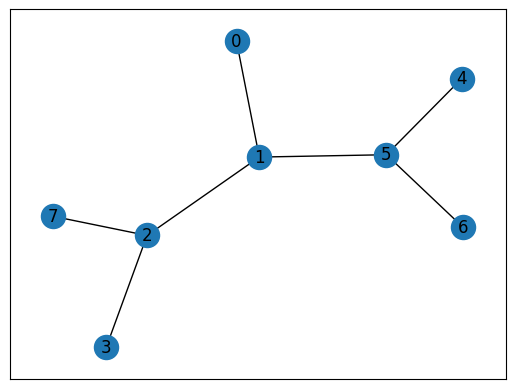

In [4]:
#https://github.com/wwt/aidn/blob/AIDN-ds-dev/aidn/routing_ai/routing_ai/topo/logical_topology.py
goal = 7
epsilon = 0.1

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [5]:
print(G.nodes)
print(G.edges)

[0, 1, 5, 6, 4, 2, 3, 7]
[(0, 1), (1, 5), (1, 2), (5, 6), (5, 4), (2, 3), (2, 7)]


In [6]:
MATRIX_SIZE = 8

# create matrix x*y
#R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
#R *= -1
#R

R = np.zeros((MATRIX_SIZE, MATRIX_SIZE))

In [9]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    R[point] = 1
    R[point[::-1]]= 1
    print(point, point[::-1])

(0, 1) (1, 0)
(1, 5) (5, 1)
(5, 6) (6, 5)
(5, 4) (4, 5)
(1, 2) (2, 1)
(2, 3) (3, 2)
(2, 7) (7, 2)


In [34]:
Qs = np.zeros([MATRIX_SIZE,MATRIX_SIZE])

# learning parameter
gamma = 0.8
Qs

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
initial_state = 1
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row > 0)[0]
    return av_act

available_act = available_actions(initial_state)
available_act

array([0, 2, 5])

In [37]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act))
    return next_action

action = sample_next_action(available_act)
action

0

In [60]:
#def update(self, s, a, r, s_next):
    #self.Qs[s,a] = self.Qs[s,a] + self.lr*(r + self.gamma*np.max(self.Qs[s_next,a]) - self.Qs[s,a])

def update(current_state, action, gamma):
    max_index = np.where(Qs[action,] == np.max(Qs[action,]))[0]
    #print(Qs[action,])
    #max_index = np.argmax(Qs[action,])
    #print(type(max_index), max_index)
    print(max_index, max_index.shape)

    if max_index.shape[0] > 1:
          max_index = np.random.choice(max_index)
    else:
          max_index = int(max_index)
    max_value = Q[action, max_index]
    
    r = R[current_state, action]
    Q[current_state, action] = r + gamma * max_value
    
    
update(initial_state, action, gamma)
Q

[0 1 2 3 4 5 6 7] (8,)


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
def train(src, dest):
    if src == dest:
        print('easy done!')
    else:
        current = src
        while current != dest:
            available_act = available_actions(current_state)
            action = sample_next_action(available_act)
            score = update(current_state,action,gamma)
        
    return score 
    

Trained Q matrix:
[[  0.          63.99863962   0.           0.           0.
    0.           0.           0.        ]
 [ 51.1989117   -0.20000446  80.          -0.20000446   0.
   51.19050776   0.           0.        ]
 [  0.          63.99863962   0.          63.99863962   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19050776   0.           0.        ]
 [  0.          63.9881347    0.           0.          40.95240621
    0.          40.95240621   0.        ]
 [  0.           0.           0.           0.           0.
   51.19050776   0.           0.        ]
 [  0.           0.          79.99955398   0.           0.
    0.           0.         100.        ]]


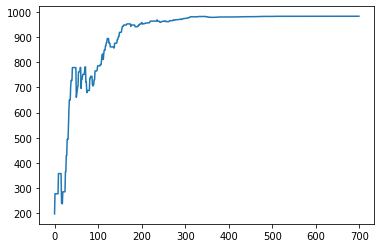

In [17]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    #print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)


plt.plot(scores)
plt.show()

In [21]:
# Testing
current_state = 4
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    print(np.where(Q[current_state,] == np.max(Q[current_state,])))
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)


(array([0]), array([5]))
(array([0]), array([1]))
(array([0]), array([2]))
(array([0]), array([7]))
Most efficient path:
[4, 5, 1, 2, 7]


In [59]:
b = np.matrix(np.random.rand(4,2))
print(b[0,])
print(b[0].shape)
print(np.array(b[0]).flatten())

[[0.80107874 0.15827025]]
(1, 2)
[0.80107874 0.15827025]


In [54]:
a = np.arange(10)
np.where(a<5)[0]

array([0, 1, 2, 3, 4])